In [2]:
getwd()

[1] "/n/fs/ragr-research/users/hirak/Projects/niche_project/COMMOT_paper_data/orator_paper_notebook"

In [5]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Springdale Open Enterprise Linux 9.2 (Parma)

Matrix products: default
BLAS/LAPACK: /n/fs/ragr-data/users/hirak/environments/mambaforge/envs/r42/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.1.3       clusterProfiler_4.8.3 readr_2.1.4          
[4] RColorBrewer_1.1-3    ggrepel_0.9.3         ggplot2_3.4.3        

loaded via a namespace (and no

In [19]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(ggrepel)
    library(dplyr)
    library(RColorBrewer)
    library(readr) # for parse_number()
    library(clusterProfiler)
    library(patchwork)
})
   

In [4]:
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width)
}
    

In [193]:
brca_df = read.csv('data/human_breast_cancer.csv')

In [194]:
brca_df = brca_df %>% filter((source == 'Surrounding tumor') | 
                    (target == 'Surrounding tumor'))

In [196]:
FDR_cutoff = 0.1
n_term = 5

dacr_tbl = brca_df %>%
    mutate(log10_p.adjust = -log10(qval)) %>%
    mutate(log10_p.adjust_cap = ifelse(log10_p.adjust>3, 3, log10_p.adjust)) %>%
    mutate(Cluster = gsub("="," → ", celltype_direction)) %>%
    mutate(Correlation = copula_coeff) %>% 
    group_by(Cluster) %>% arrange(Correlation) %>% slice_tail(n=n_term) %>% ungroup

In [197]:
mat <- dacr_tbl %>% 
  select(Correlation, celltype_direction, lig_rec) %>%  
  tidyr::pivot_wider(names_from = celltype_direction, values_from = Correlation) %>% 
  data.frame() # make df as tibbles -> matrix annoying


In [198]:
df_toplot = dacr_tbl %>% filter(pval<FDR_cutoff)

In [199]:
df_toplot$lig_rec = factor(df_toplot$lig_rec, levels=mat$lig_rec)

In [200]:
theme_cancer = theme_bw() + theme(
    legend.position = "bottom", 
    axis.text = element_text(color="black"), 
    axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
    plot.margin = margin(0,0,0,0,'pt')
)

p_dot = ggplot(df_toplot, 
               aes_string(
                   x="Cluster", y="lig_rec", 
                   fill="log10_p.adjust_cap", size="Correlation")) +
  geom_point(shape=21, color="black") +
  paletteer::scale_fill_paletteer_c("grDevices::Heat", direction = -1, 
                                    limits = c(-log10(0.2), 3.1), 
                                    breaks = -log10(c(FDR_cutoff, 0.1, 0.05, 0.01, 0.001)), 
                                    labels = c(FDR_cutoff, "0.1", "0.05", "0.01", "0.001")) +
  scale_size(range=c(1,7)) +
  theme_cancer +
  theme(axis.text = element_text(size=12, color="black")) + 
  labs(y="", x="",title="", size="Correlation", fill="FDR") +
  theme(axis.text.y = element_text(size=14)) +
  theme(legend.position="right", legend.box="vertical")

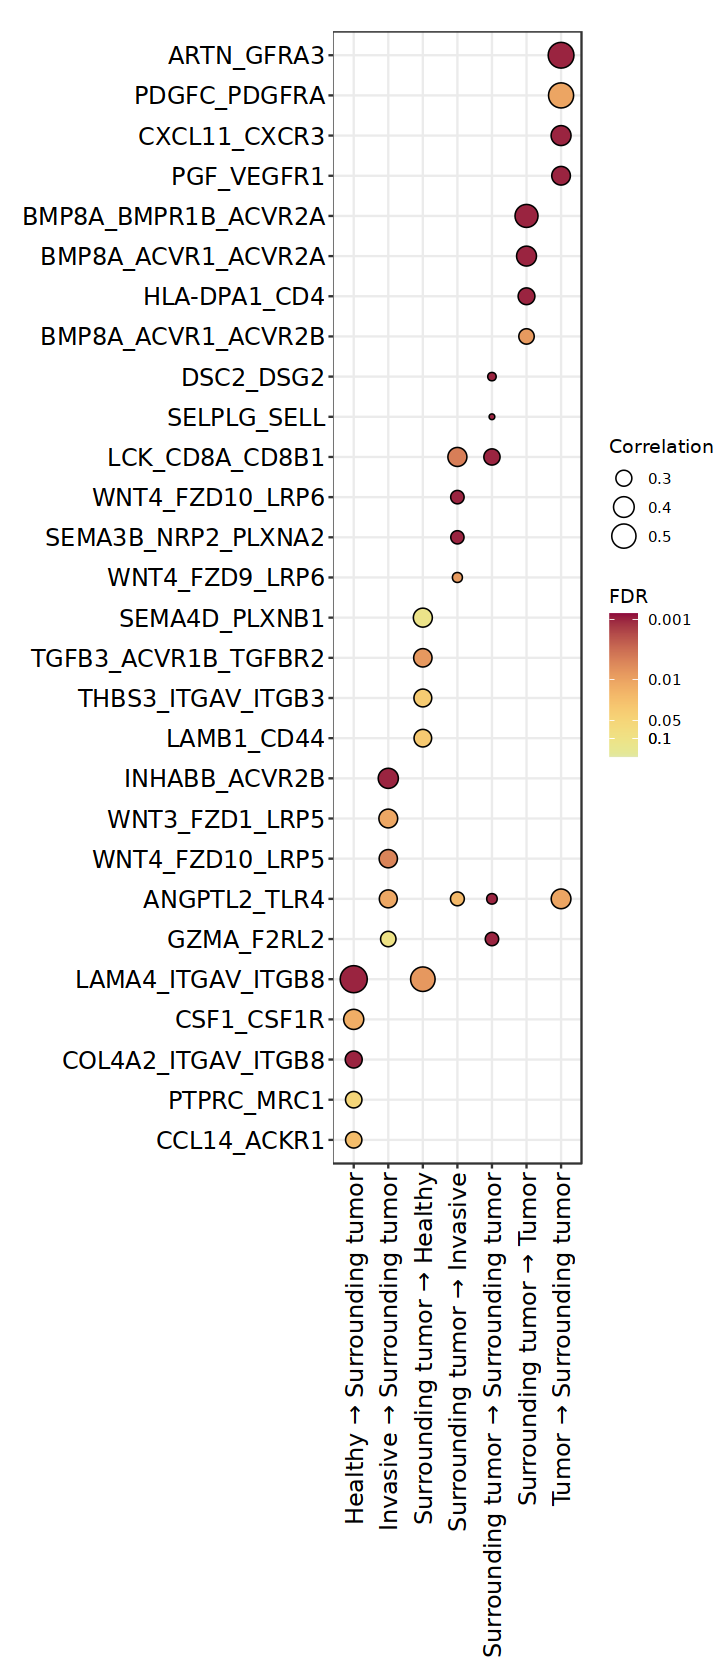

In [201]:
fig.size(14,6)
p_dot

In [202]:
mosta_df = read.csv('data/mosta_significant_scores.csv')

In [203]:
mosta_df = mosta_df %>% filter((source == 'Neural crest') | 
                    (target == 'Neural crest'))

In [210]:
FDR_cutoff = 0.1
n_term = 3

dacr_tbl = mosta_df %>%
    mutate(log10_p.adjust = -log10(qval)) %>%
    mutate(log10_p.adjust_cap = ifelse(log10_p.adjust>3, 3, log10_p.adjust)) %>%
    mutate(Cluster = gsub("="," → ", celltype_direction)) %>%
    mutate(Correlation = copula_coeff) %>% 
    group_by(Cluster) %>% arrange(Correlation) %>% slice_tail(n=n_term) %>% ungroup

In [211]:
mat <- dacr_tbl %>% 
  select(Correlation, celltype_direction, lig_rec) %>%  
  tidyr::pivot_wider(names_from = celltype_direction, values_from = Correlation) %>% 
  data.frame() # make df as tibbles -> matrix annoying

In [212]:
df_toplot = dacr_tbl %>% filter(pval<FDR_cutoff)

In [213]:
df_toplot$lig_rec = factor(df_toplot$lig_rec, levels=mat$lig_rec)

In [214]:
theme_cancer = theme_bw() + theme(
    legend.position = "bottom", 
    axis.text = element_text(color="black"), 
    axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
    plot.margin = margin(0,0,0,0,'pt')
)

p_dot = ggplot(df_toplot, 
               aes_string(
                   x="Cluster", y="lig_rec", 
                   fill="log10_p.adjust_cap", size="Correlation")) +
  geom_point(shape=21, color="black") +
  paletteer::scale_fill_paletteer_c("grDevices::Heat", direction = -1, 
                                    limits = c(-log10(0.2), 3.1), 
                                    breaks = -log10(c(FDR_cutoff, 0.1, 0.05, 0.01, 0.001)), 
                                    labels = c(FDR_cutoff, "0.1", "0.05", "0.01", "0.001")) +
  scale_size(range=c(1,7)) +
  theme_cancer +
  theme(axis.text = element_text(size=12, color="black")) + 
  labs(y="", x="",title="", size="Correlation", fill="FDR") +
  theme(axis.text.y = element_text(size=14)) +
  theme(legend.position="right", legend.box="vertical")

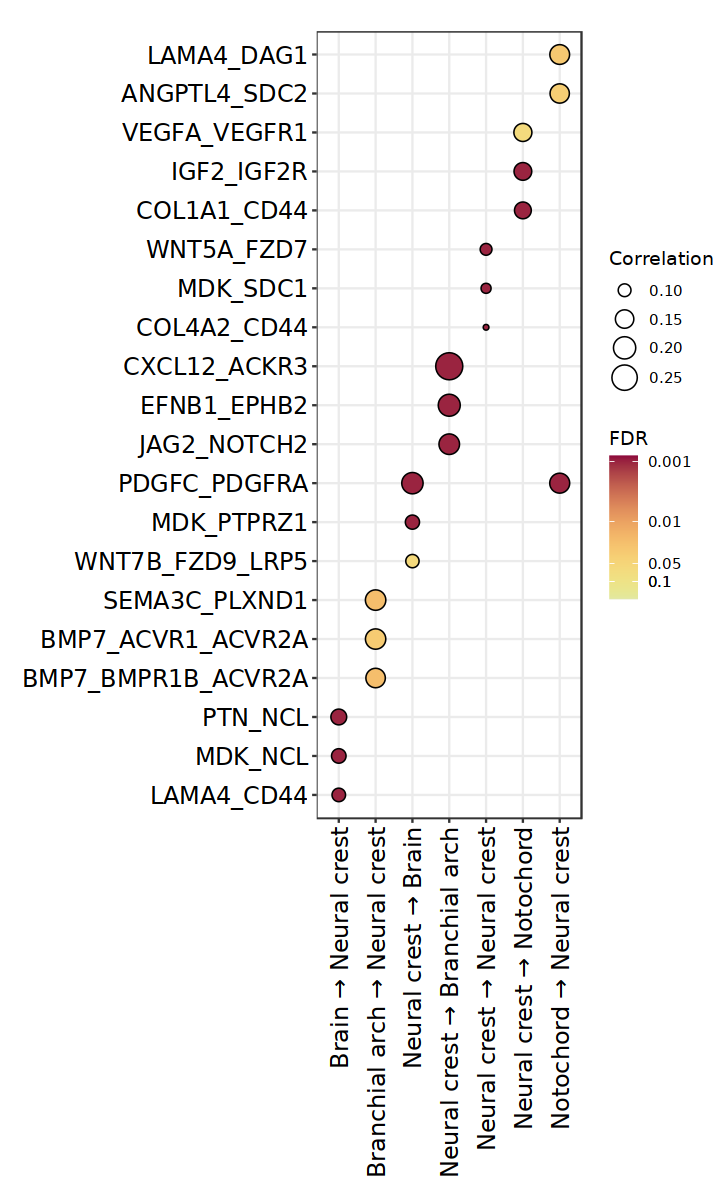

In [215]:
fig.size(10,6)
p_dot

In [222]:
theme_cancer = theme_bw() + theme(
    legend.position = "bottom", 
    axis.text = element_text(color="black"), 
    axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
    plot.margin = margin(0,0,0,0,'pt')
)

p_dot = ggplot(df_toplot, 
               aes_string(
                   x="lig_rec", y="Cluster", 
                   fill="log10_p.adjust_cap", size="Correlation")) +
  geom_point(shape=21, color="black") +
  paletteer::scale_fill_paletteer_c("grDevices::Heat", direction = -1, 
                                    limits = c(-log10(0.2), 3.1), 
                                    breaks = -log10(c(FDR_cutoff, 0.1, 0.05, 0.01, 0.001)), 
                                    labels = c(FDR_cutoff, "0.1", "0.05", "0.01", "0.001")) +
  scale_size(range=c(1,7)) +
  theme_cancer +
  theme(axis.text = element_text(size=12, color="black")) + 
  labs(y="", x="",title="", size="Correlation", fill="FDR") +
  theme(axis.text.y = element_text(size=14)) +
  theme(legend.position="bottom", legend.box="vertical")

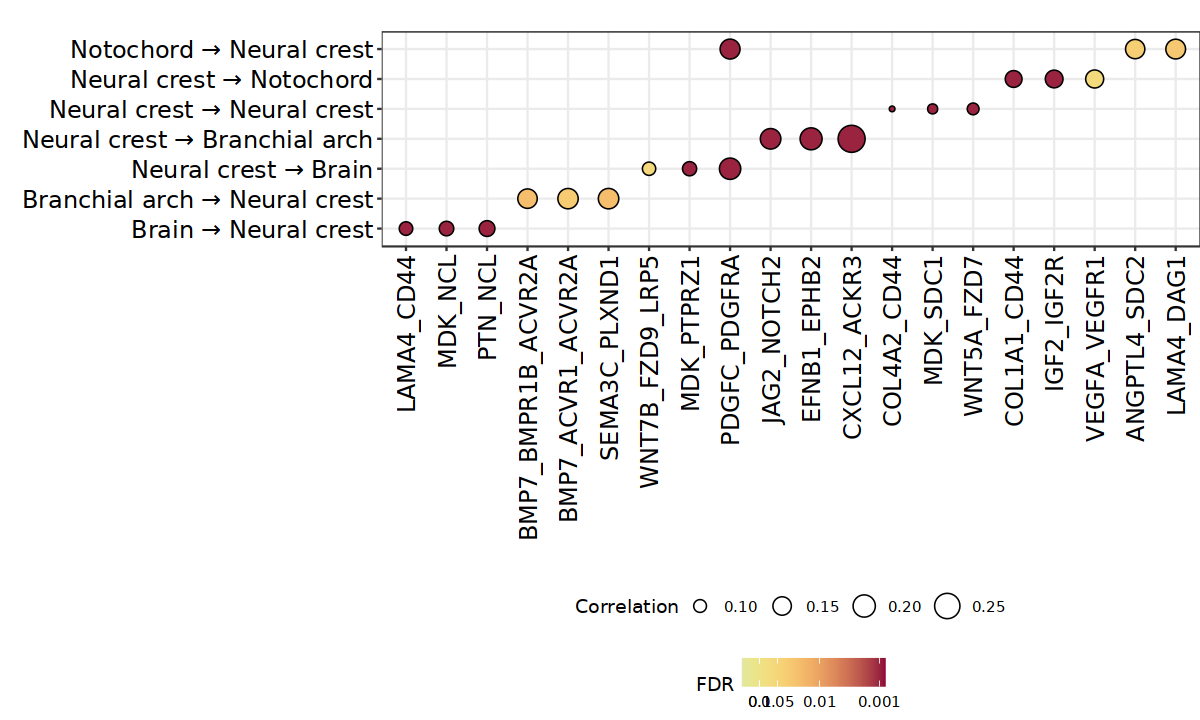

In [223]:
fig.size(6,10)
p_dot

In [155]:
df_toplot$lig_rec = factor(df_toplot$lig_rec, levels=mat$lig_rec)
#df_toplot$GeneRatio = sapply(df_toplot$GeneRatio, function(x) eval(parse(text=x)))

In [132]:
pathway_order = df_toplot %>% group_by(lig_rec) %>% 
  summarise(p_min = min(qval), n=n()) %>% 
  arrange(desc(n), p_min) %>% pull(lig_rec) %>% unique

In [156]:
theme_cancer = theme_bw() + theme(legend.position = "bottom", axis.text = element_text(color="black"), 
                                  axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
                                  plot.margin = margin(0,0,0,0,'pt'))

p_dot = ggplot(df_toplot, 
               aes_string(
                   x="Cluster", y="lig_rec", 
                   fill="log10_p.adjust_cap", size="Correlation")) +
  geom_point(shape=21, color="black") +
  paletteer::scale_fill_paletteer_c("grDevices::Heat", direction = -1, 
                                    limits = c(-log10(0.2), 3.1), 
                                    breaks = -log10(c(FDR_cutoff, 0.1, 0.05, 0.01, 0.001)), 
                                    labels = c(FDR_cutoff, "0.1", "0.05", "0.01", "0.001")) +
  scale_size(range=c(1,7)) +
  theme_cancer +
  theme(axis.text = element_text(size=12, color="black")) + 
  labs(y="", x="",title="", size="Correlation", fill="FDR") +
  theme(axis.text.y = element_text(size=14)) +
  theme(legend.position="right", legend.box="vertical")

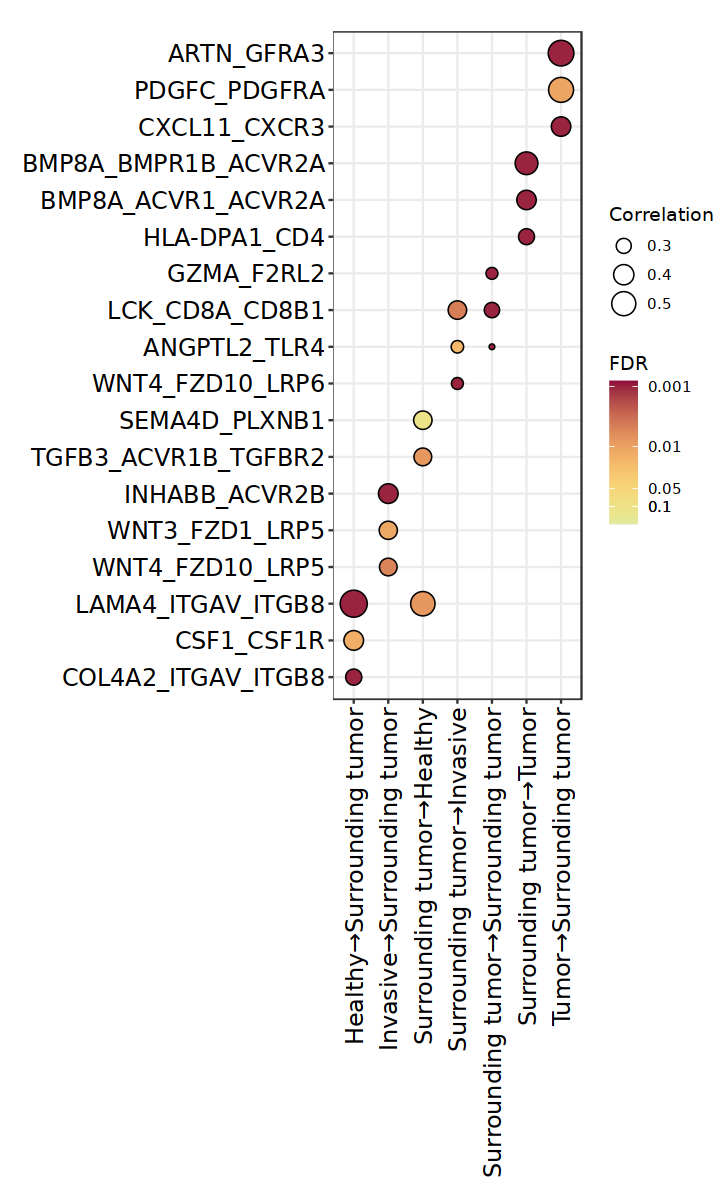

In [157]:
fig.size(10,6)
p_dot

In [61]:
mat <- mosta_df %>% 
  select(, -cell_exp_ct, -Group) %>%  # drop unused columns to faciliate widening
  pivot_wider(names_from = cluster, values_from = count) %>% 
  data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$Gene  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
clust <- hclust(dist(mat %>% as.matrix())) # hclust with distance matrix


ddgram <- as.dendrogram(clust) # create dendrogram
ggtree_plot <- ggtree::ggtree(ddgram)
ggtree_plot

[1] "PDGFC_PDGFRA"       "MIF_CD74_CD44"      "BMP4_BMPR1A_BMPR2" 
 [4] "COL1A1_ITGAV_ITGB8" "CXCL12_ACKR3"       "EFNA2_EPHA4"       
 [7] "MDK_PTPRZ1"         "NCAM1_FGFR1"        "PTN_NCL"           
[10] "SEMA3C_NRP2_PLXNA3" "SEMA4D_PLXNB2"      "THBS1_ITGAV_ITGB3" 
[13] "WNT5A_FZD7"         "EFNA5_EPHB2"        "LAMA5_ITGA3_ITGB1" 
[16] "SEMA3C_PLXND1"      "CXCL12_CXCR4"       "PROS1_AXL"         
[19] "COL4A1_ITGAV_ITGB8" "NECTIN1_NECTIN3"    "VEGFA_VEGFR1"      
[22] "EFNB3_EPHB3"

In [ ]:
dacr_cancer_tbl = enrich_pseudotime_all@compareClusterResult %>% 
  mutate(Description = paste0(Description, " (", gs_size[Description], ")")) %>%
  mutate(log10_p.adjust = -log10(p.adjust)) %>% 
  mutate(log10_p.adjust_cap = ifelse(log10_p.adjust>3, 3, log10_p.adjust)) %>%
  mutate(Description = gsub("HALLMARK_","", Description)) %>% 
  mutate(Cluster = paste0(Cluster, " (", unlist(lapply(gene_pseudotime_list, length))[Cluster], ")")) %>%
  group_by(Cluster) %>% arrange(p.adjust, Count) %>% ungroup
df_toplot = dacr_cancer_tbl %>% filter(p.adjust<FDR_cutoff, Count>=5)
pathway_order = df_toplot %>% group_by(Description) %>% 
  summarise(p_min = min(p.adjust), n=n()) %>% 
  arrange(desc(n), p_min) %>% pull(Description) %>% unique

df_toplot$Description = factor(df_toplot$Description, levels=rev(pathway_order))
df_toplot$GeneRatio = sapply(df_toplot$GeneRatio, function(x) eval(parse(text=x)))

theme_cancer = theme_bw() + theme(legend.position = "right", axis.text = element_text(color="black"), 
                                  axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
                                  plot.margin = margin(0,0,0,0,'pt'))
p_dot = ggplot(df_toplot, aes_string(
    x="Cluster", y="Description", fill="log10_p.adjust_cap", size="Count")) +
  geom_point(shape=21, color="black") +
  paletteer::scale_fill_paletteer_c("grDevices::Heat", direction = -1, 
                                    limits = c(-log10(0.2), 3.1), 
                                    breaks = -log10(c(FDR_cutoff, 0.1, 0.05, 0.01, 0.001)), 
                                    labels = c(FDR_cutoff, "0.1", "0.05", "0.01", "0.001")) +
  scale_size(range=c(1,7)) +
  theme_cancer +
  theme(axis.text = element_text(size=12, color="black")) + 
  labs(y="", x="",title="", size="#Genes", fill="FDR") +
  theme(axis.text.y = element_text(size=14)) +
  theme(legend.position="right", legend.box="vertical")